## Code for reading an individual TB run

In [3]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Path to the event file
event_file = '../../data/runs/'

# Create an EventAccumulator object
event_acc = EventAccumulator(event_file)

# Load the events from the file
event_acc.Reload()

# Access the scalar data
scalar_tags = event_acc.Tags()['scalars']

for tag in scalar_tags:
    scalar_events = event_acc.Scalars(tag)
    for event in scalar_events:
        # Access the step, wall_time, and value
        print(event.step, event.wall_time, event.value)

In [4]:
from tbparse import SummaryReader

log_dir = '../../data/runs/'
reader = SummaryReader(log_dir)

In [5]:
reader.scalars

,step,tag,value
0,0,eval/HH20210312-en_cer,0.639754
1,0,eval/HH20210312-en_cer,0.260714
2,0,eval/HH20210312-en_cer,0.260714
3,0,eval/HH20210312-en_cer,0.260714
4,0,eval/HH20210312-en_cer,0.639754
...,...,...,...
19360,20480,train/train_steps_per_second,0.464000
19361,20480,train/train_steps_per_second,0.426000
19362,20480,train/train_steps_per_second,0.424000
19363,20480,train/train_steps_per_second,0.423000


# Read all runs and put into csv

In [6]:
from glob import glob
from tbparse import SummaryReader
import pandas as pd
import os
from datetime import datetime
import seaborn as sb

In [7]:
globstr = '../../data/runs/whisper-medium-tira*'
run_dirs = glob(globstr)
run_dirs

['../../data/runs/whisper-medium-tira-yoruba-lid-alpha-0.6',
 '../../data/runs/whisper-medium-tira-yoruba-LoRA-lid-alpha-0.6',
 '../../data/runs/whisper-medium-tira-yoruba-LoRA-lid-alpha-0.8',
 '../../data/runs/whisper-medium-tira-yoruba-lid-alpha-0.8',
 '../../data/runs/whisper-medium-tira-croatian-LoRA-lid-alpha-0.6',
 '../../data/runs/whisper-medium-tira-croatian-LoRA-lid-alpha-0.8',
 '../../data/runs/whisper-medium-tira-croatian-lid-alpha-0.4',
 '../../data/runs/whisper-medium-tira-swahili-LoRA-lid-alpha-0.2',
 '../../data/runs/whisper-medium-tira-croatian-lid-alpha-0.2',
 '../../data/runs/whisper-medium-tira-swahili-LoRA-lid-alpha-0.4',
 '../../data/runs/whisper-medium-tira-swahili-lid-alpha-0.6',
 '../../data/runs/whisper-medium-tira-LoRA-swahili',
 '../../data/runs/whisper-medium-tira-swahili-lid-alpha-0.8',
 '../../data/runs/whisper-medium-tira-LoRA-yoruba',
 '../../data/runs/whisper-medium-tira-croatian-LoRA-lid-alpha-0.2',
 '../../data/runs/whisper-medium-tira-yoruba-lid-alph

In [8]:
def get_latest_run(run_dir: str) -> str:
    run_files = glob(os.path.join(run_dir, 'runs', '*'))
    run_date_strs = [os.path.basename(run_file)[:14] for run_file in run_files]
    run_file_dates = [datetime.strptime(run_date, '%b%d_%H-%M-%S') for run_date in run_date_strs]
    run_file_tuples = list(
        zip(run_files, run_file_dates)
    )
    run_file_tuples.sort(
        key=lambda t:t[1],
        reverse=True
    )
    return run_file_tuples[0][0]
get_latest_run('/Users/markjos/projects/malachor5/data/runs/whisper-medium-tira-croatian-lid-alpha-0.4')

'/Users/markjos/projects/malachor5/data/runs/whisper-medium-tira-croatian-lid-alpha-0.4/runs/Nov29_17-34-29_SSCF-WITCHKING.ucsd.edu'

In [9]:
df_list = []
for run_dir in run_dirs:
    run_path = get_latest_run(run_dir)
    run_name = os.path.basename(run_dir)
    reader = SummaryReader(run_path)
    run_df = reader.scalars
    run_df['experiment_name'] = run_name
    df_list.append(run_df)
df = pd.concat(df_list)
df

,step,tag,value,experiment_name
0,0,eval/HH20210312-en_cer,6.397535e-01,whisper-medium-tira-yoruba-lid-alpha-0.6
1,1000,eval/HH20210312-en_cer,6.713746e-01,whisper-medium-tira-yoruba-lid-alpha-0.6
2,2000,eval/HH20210312-en_cer,6.850486e-01,whisper-medium-tira-yoruba-lid-alpha-0.6
3,3000,eval/HH20210312-en_cer,7.840950e-01,whisper-medium-tira-yoruba-lid-alpha-0.6
4,4000,eval/HH20210312-en_cer,6.881972e-01,whisper-medium-tira-yoruba-lid-alpha-0.6
...,...,...,...,...
669,20480,train/total_flos,1.672159e+20,whisper-medium-tira-swahili-lid-alpha-0.4
670,20480,train/train_loss,2.991046e-02,whisper-medium-tira-swahili-lid-alpha-0.4
671,20480,train/train_runtime,4.695188e+04,whisper-medium-tira-swahili-lid-alpha-0.4
672,20480,train/train_samples_per_second,3.490000e+00,whisper-medium-tira-swahili-lid-alpha-0.4


In [10]:
df['tag'].unique()

array(['eval/HH20210312-en_cer', 'eval/HH20210312-en_loss',
       'eval/HH20210312-en_runtime',
       'eval/HH20210312-en_samples_per_second',
       'eval/HH20210312-en_steps_per_second', 'eval/HH20210312-en_wer',
       'eval/HH20210913-en_cer', 'eval/HH20210913-en_loss',
       'eval/HH20210913-en_runtime',
       'eval/HH20210913-en_samples_per_second',
       'eval/HH20210913-en_steps_per_second', 'eval/HH20210913-en_wer',
       'eval/fl_en-en_cer', 'eval/fl_en-en_loss', 'eval/fl_en-en_runtime',
       'eval/fl_en-en_samples_per_second',
       'eval/fl_en-en_steps_per_second', 'eval/fl_en-en_wer',
       'eval/tira-clean-split-yoruba_cer',
       'eval/tira-clean-split-yoruba_loss',
       'eval/tira-clean-split-yoruba_runtime',
       'eval/tira-clean-split-yoruba_samples_per_second',
       'eval/tira-clean-split-yoruba_steps_per_second',
       'eval/tira-clean-split-yoruba_wer', 'train/epoch',
       'train/grad_norm', 'train/learning_rate', 'train/loss',
       'train/tot

In [11]:
get_lid_loss_alpha = lambda s: s.split('lid-alpha-')[-1] if 'lid-alpha-' in s else None
df['lid_loss_alpha']=df['experiment_name'].apply(get_lid_loss_alpha)

df['LoRA'] = df['experiment_name'].str.contains('LoRA')

get_lang_prompt = lambda s: 'swahili' if 'swahili' in s else\
    'croatian' if 'croatian' in s else\
    'yoruba' if 'yoruba' in s else\
    'LID' if 'LID' in s else\
    -1
df['lang_prompt'] = df['experiment_name'].apply(get_lang_prompt)

df.head()

,step,tag,value,experiment_name,lid_loss_alpha,LoRA,lang_prompt
0,0,eval/HH20210312-en_cer,0.639754,whisper-medium-tira-yoruba-lid-alpha-0.6,0.6,False,yoruba
1,1000,eval/HH20210312-en_cer,0.671375,whisper-medium-tira-yoruba-lid-alpha-0.6,0.6,False,yoruba
2,2000,eval/HH20210312-en_cer,0.685049,whisper-medium-tira-yoruba-lid-alpha-0.6,0.6,False,yoruba
3,3000,eval/HH20210312-en_cer,0.784095,whisper-medium-tira-yoruba-lid-alpha-0.6,0.6,False,yoruba
4,4000,eval/HH20210312-en_cer,0.688197,whisper-medium-tira-yoruba-lid-alpha-0.6,0.6,False,yoruba


Text(0.5, 1.0, 'Performance on English while decoding as Yoruba')

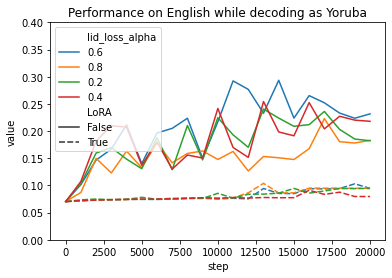

In [12]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/fl_en-en_cer') &
        (~df['lid_loss_alpha'].isna()) &
        (df['lang_prompt']=='yoruba')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on English while decoding as Yoruba')

Text(0.5, 1.0, 'Performance on English while decoding as Swahili')

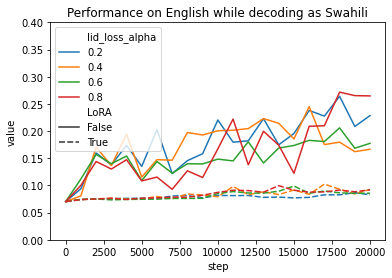

In [15]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/fl_en-en_cer') &
        (~df['lid_loss_alpha'].isna()) &
        (df['lang_prompt']=='swahili')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on English while decoding as Swahili')

Text(0.5, 1.0, 'Performance on English while decoding as Croatian')

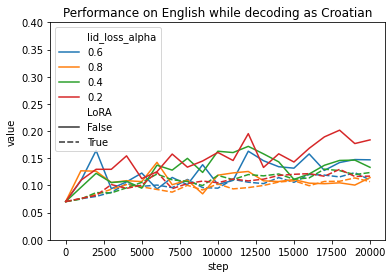

In [16]:
ax=sb.lineplot(
    df[
        (df['tag']=='eval/fl_en-en_cer') &
        (~df['lid_loss_alpha'].isna()) &
        (df['lang_prompt']=='croatian')
    ],
    x='step',
    y='value',
    hue='lid_loss_alpha',
    errorbar=None,
    style='LoRA',
)
ax.set(ylim=(0, 0.4))
ax.set_title('Performance on English while decoding as Croatian')